<h1><center>Fertility Diagnosis using Logistic Regression</center></h1>

### The entire notebook has this following flow.

<i>Phase 1 : Code based on implementation of logistic regression from scratch</i> <br>
<i>Phase 2 : Code based on inbuilt logistic regression from sklearn</i> <br>
<i>Phase 3 : Code based on augmenting and adding noise to the data for improving f1 score and implementation of that using logistic regression from scratch</i> <br>
<i>Phase 4 : Code based on performance of updated data using inbuilt logistic regression from sklearn</i> <br>
<i>Phase 5 : Definitions</i> <br>

<h2><center>Phase 1</center></h2>

In [33]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, log_loss

In [34]:
#reading the data

data = pd.read_csv('fertility_Diagnosis.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [35]:
# mapping the data to binary values

data[9] = data[9].map({'N': 1, 'O': 0})
data.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,1
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,1
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,1
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,0


In [36]:
# diving the columns into features and target variable

X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

#converting them to numpy arrays

X = np.array(X)
y = np.array(y)

In [37]:
#splitting the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Importing the necessary libraries
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hypothesis function
def hx(w, X):
    z = np.array(w[0] + w[1]*np.array(X[:,0]) + w[2]*np.array(X[:,1]) + w[3]*np.array(X[:, 2]) + w[4]*np.array(X[:, 3]) + w[5]*np.array(X[:, 4]) + w[6]*np.array(X[:, 5]) + w[7]*np.array(X[:, 6]) + w[8]*np.array(X[:, 7]) + w[9]*np.array(X[:, 8]))
    return sigmoid(z)

# Cost function
def cost(w, X, Y):
    y_pred = hx(w, X)
    return -1 * sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))

# Gradient function
def grad(w, X, Y):
    y_pred = hx(w, X)
    g = [0]*10
    g[0] = -1 * sum(Y*(1-y_pred) - (1-Y)*y_pred)
    g[1] = -1 * sum(Y*(1-y_pred)*X[:,0] - (1-Y)*y_pred*X[:,0])
    g[2] = -1 * sum(Y*(1-y_pred)*X[:,1] - (1-Y)*y_pred*X[:,1])
    g[3] = -1 * sum(Y*(1-y_pred)*X[:,2] - (1-Y)*y_pred*X[:,2])
    g[4] = -1 * sum(Y*(1-y_pred)*X[:,3] - (1-Y)*y_pred*X[:,3])
    g[5] = -1 * sum(Y*(1-y_pred)*X[:,4] - (1-Y)*y_pred*X[:,4])
    g[6] = -1 * sum(Y*(1-y_pred)*X[:,5] - (1-Y)*y_pred*X[:,5])
    g[7] = -1 * sum(Y*(1-y_pred)*X[:,6] - (1-Y)*y_pred*X[:,6])
    g[8] = -1 * sum(Y*(1-y_pred)*X[:,7] - (1-Y)*y_pred*X[:,7])
    g[9] = -1 * sum(Y*(1-y_pred)*X[:,8] - (1-Y)*y_pred*X[:,8])

    return g

# Gradient descent function
def descent(w_new, w_prev, lr, itr):
    print(w_prev)
    print(cost(w_prev, X_train, y_train))
    j = 0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr*grad(w_prev, X_train, y_train)[0]
        w1 = w_prev[1] - lr*grad(w_prev, X_train, y_train)[1]
        w2 = w_prev[2] - lr*grad(w_prev, X_train, y_train)[2]
        w3 = w_prev[3] - lr*grad(w_prev, X_train, y_train)[3]
        w4 = w_prev[4] - lr*grad(w_prev, X_train, y_train)[4]
        w5 = w_prev[5] - lr*grad(w_prev, X_train, y_train)[5]
        w6 = w_prev[6] - lr*grad(w_prev, X_train, y_train)[6]
        w7 = w_prev[7] - lr*grad(w_prev, X_train, y_train)[7]
        w8 = w_prev[8] - lr*grad(w_prev, X_train, y_train)[8]
        w9 = w_prev[9] - lr*grad(w_prev, X_train ,y_train)[9]
        w_new = [w0, w1, w2, w3, w4, w5, w6, w7, w8, w9]
        print(w_new)
        print(cost(w_new, X_train, y_train))
        if ((w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 + (w_new[2]-w_prev[2])**2 + (w_new[3]-w_prev[3])**2 + (w_new[4]-w_prev[4])**2 + (w_new[5]-w_prev[5])**2 + (w_new[6]-w_prev[6])**2 + (w_new[7]-w_prev[7])**2 + (w_new[8]-w_prev[8])**2 + (w_new[9]-w_prev[9])**2  <pow(10,-6)):
            return w_new

        if j > itr:
            return w_new
        j += 1


In [39]:
#initializing the weights

w=[1,1,1,1,1,1,1,1,1,1]

In [40]:
#training the model

w = descent(w,w,.0099, 100)
print(w)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
50.380054444209314
[0.9211193995517378, 0.9453530392542486, 0.9403989413492425, 0.9340078286071131, 0.9936299686831678, 0.9382701907639688, 0.9884074722450559, 0.9418843990042808, 1.0037286460922215, 0.972599742230086]
47.885128188767915
[0.8468721138899016, 0.8892733528423418, 0.8837500134220373, 0.8714834413192647, 0.9881728886191165, 0.8787070359094812, 0.976811265176569, 0.8877582199568406, 1.0038316897647834, 0.9471580646355175]
45.614532943058926
[0.7778974163103791, 0.8317827810745726, 0.8304709511699689, 0.812968529856781, 0.9837718709010332, 0.8217146214780358, 0.9652503043504782, 0.838175718632387, 0.9998427432357597, 0.9239326863675427]
43.580463686456824
[0.7147299738451022, 0.7730151219697787, 0.7809171646575498, 0.7589247376972351, 0.9805481546306319, 0.7676651700705936, 0.9537564514830557, 0.7935989182154287, 0.991394912724913, 0.903132681851361]
41.78395123858284
[0.6577310702485096, 0.7132255072795064, 0.7353371147024027, 0.70967413575239

In [41]:
# Initialize an empty list to store the predicted values
y_pred = []

# Initialize variables to keep track of the counts of false negatives, false positives, true negatives, and true positives
FN, FP, TN, TP = 0, 0, 0, 0

# Iterate over each sample in the test set
for i in range(len(X_test)):
    # If the predicted value is less than 0.5, classify it as 0
    if hx(w, X_test)[i] < 0.5:
        y_pred.append(0)
        # If the actual value is 1, increment the count of false negatives (FN)
        if y_test[i] == 1:
            FN += 1
        # If the actual value is 0, increment the count of true negatives (TN)
        else:
            TN += 1
    # If the predicted value is greater than or equal to 0.5, classify it as 1
    else:
        y_pred.append(1)
        # If the actual value is 1, increment the count of true positives (TP)
        if y_test[i] == 1:
            TP += 1
        # If the actual value is 0, increment the count of false positives (FP)
        else:
            FP += 1

# Print the counts of false negatives, false positives, true negatives, and true positives
print(FN, FP, TN, TP)

0 2 0 18


In [42]:
#confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 0  2]
 [ 0 18]]


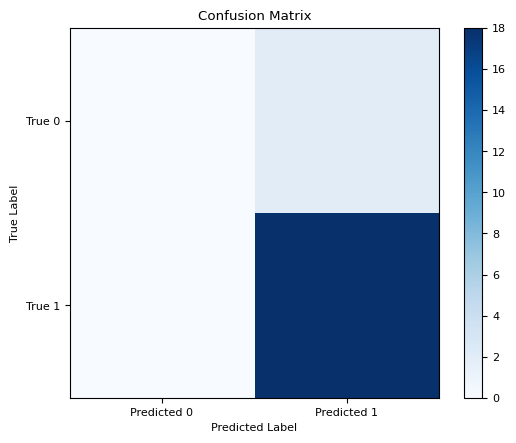

In [43]:
#plotting the matrix

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])
plt.show()

In [44]:
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.90      1.00      0.95        18

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



In [45]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_proba(weights, X):    
    proba = []
    # Iterate over each sample in X
    for i in range(0, X_test.shape[0]):
        z = 0
        # Calculate the weighted sum of features
        for j in range(0, 9):            
            z += X_test[i][j] * weights[j + 1]    
        z += weights[0]
        # Apply sigmoid function to get the predicted probability
        proba.append(sigmoid(z))            
    return proba

# Predict probabilities for class 1
y_prob = predict_proba(w, X_test)
y_prob = np.array(y_prob)


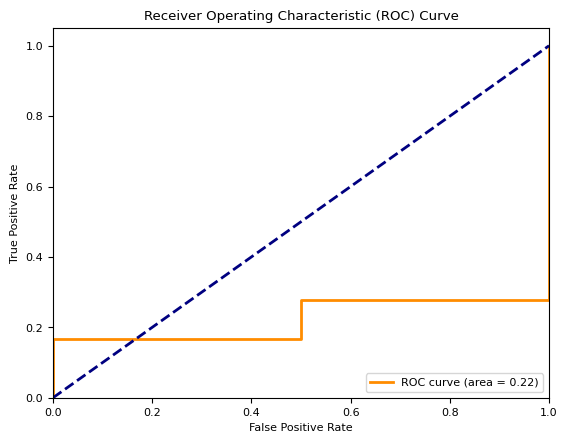

Log Loss: 0.48365183692388164


In [46]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
logloss = log_loss(y_test, y_prob)
print("Log Loss:", logloss)

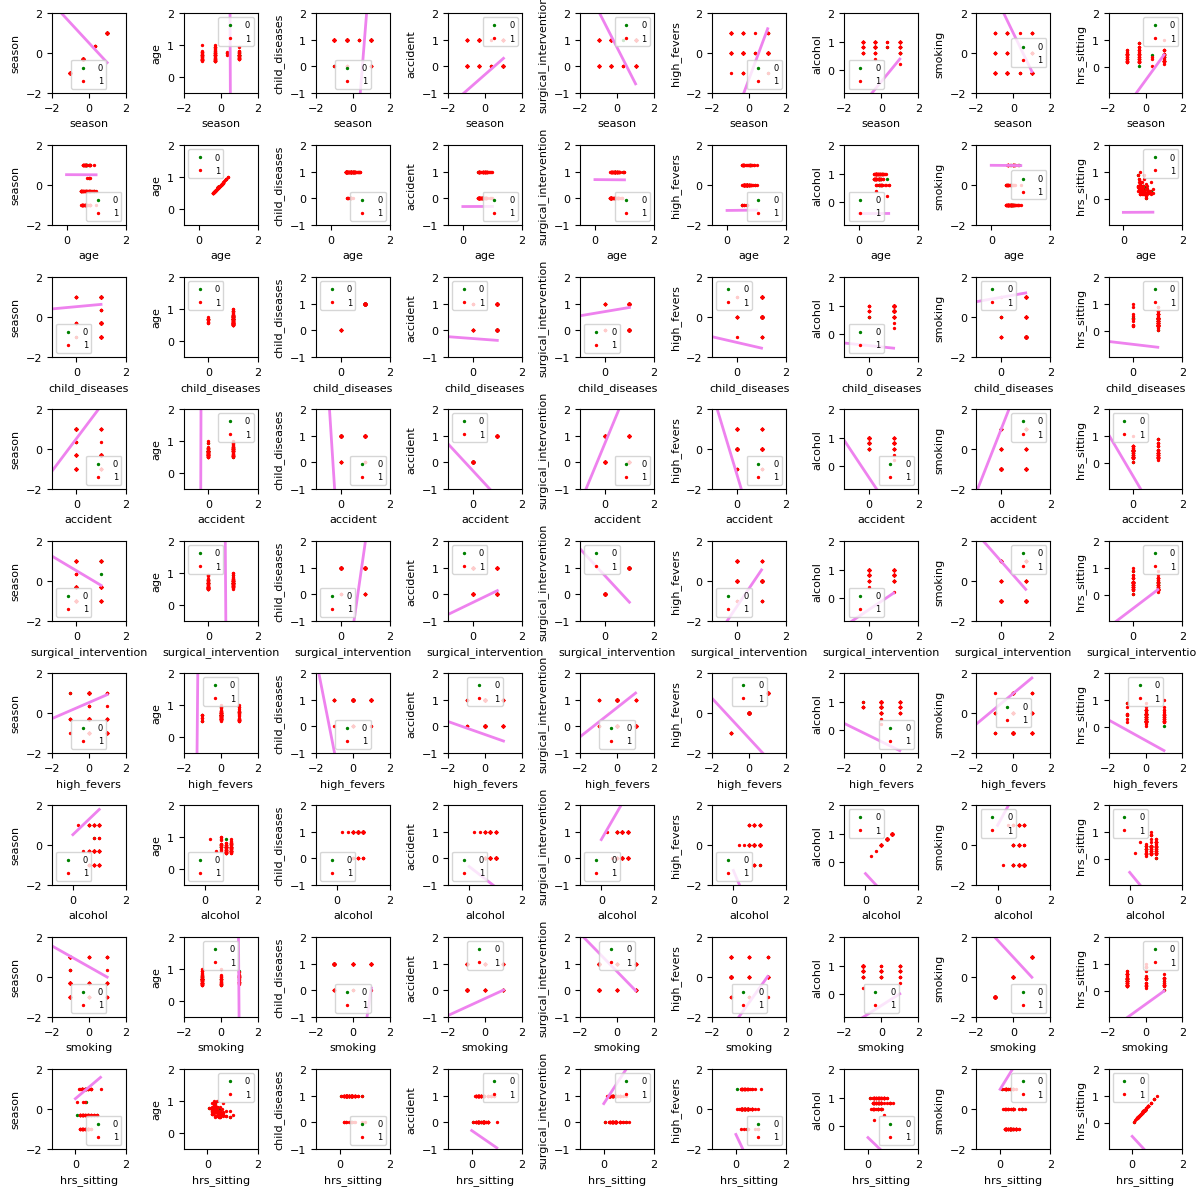

In [47]:
#plotting the pair plots even though the type of data is not suitable for pair plots like it includes catergorical, binary, interger and continuous data, it just to show the pair plots and the boundary line

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

column_names = ['season', 'age', 'child_diseases', 'accident', 'surgical_intervention', 'high_fevers', 'alcohol', 'smoking', 'hrs_sitting', 'diagnosis']
# Custom function to plot decision boundary based on weights and bias
def graph(formula, x_range, i, j, ax):
    x = np.array(x_range)
    y = formula(x)
    ax.plot(x, y, color='violet', linewidth=2, linestyle='solid')  # Adjust line properties for visibility

def my_formula(x, i, j):
    return (-w[0] - w[i + 1] * x) / w[j + 1]

# Create a grid layout for subplots
fig, axes = plt.subplots(9, 9, figsize=(12, 12))

# Loop through each pair of features for plotting
for i in range(9):
    for j in range(9):
        # if i != j:  # Exclude same feature pairs
            df = pd.DataFrame({'x': X[:, i], 'y': X[:, j], 'label': y})
            colors = {0: 'green', 1: 'red'}
            grouped = df.groupby('label')

            ax = axes[i, j]  # Get current axis
            for key, group in grouped:
                group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key], s = 2)
                # ax.scatter(x=group['x'], y=group['y'], label=key, color=colors[key], s=5)  # Decrease scatter point size

            # Plot decision boundary
            x_min, x_max = df['x'].min() - 1, df['x'].max() + 1
            graph(lambda x_val, i=i, j=j: my_formula(x_val, i, j), range(int(x_min), int(x_max)), i, j, ax)

            ax.set_xlabel(column_names[i])
            ax.set_ylabel(column_names[j])
            ax.set_xlim(x_min, x_max)  # Set x-axis range
            ax.set_ylim(df['y'].min() - 1, df['y'].max() + 1)  # Set y-axis range
            ax.tick_params(axis='both', which='major', labelsize=8)
            ax.legend(prop={'size': 6})

# Remove empty subplots and adjust layout
# for i in range(9):
#     for j in range(9):
#         if i == j:
#             axes[i, j].axis('off')

plt.tight_layout()
plt.rcParams.update({'font.size': 8})
plt.show()


## At the end of Phase 1 the values are

       class    precision   recall   f1-score    support

           0       0.00      0.00      0.00         2
           1       0.90      1.00      0.95        18

    accuracy                           0.90        20


<br>Log loss : 0.48365183692388164<br>
AUC : 0.22

<h1><center>Phase 2</center></h1>

In [48]:
#using inbuilt functions

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 0  2]
 [ 0 18]]


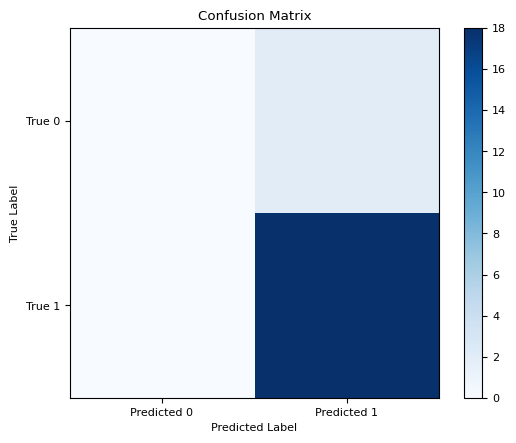

In [49]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])
plt.show()

In [50]:
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.90      1.00      0.95        18

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



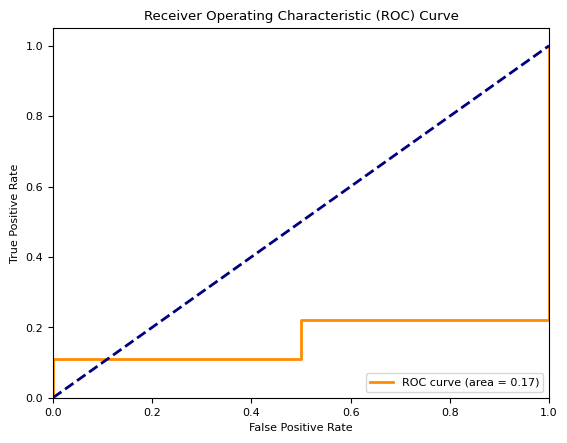

Log Loss: 0.46504578074487474


In [51]:
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

logloss = log_loss(y_test, y_prob)
print("Log Loss:", logloss)

## At the end of Phase 2 the values are

       class    precision   recall   f1-score    support

           0       0.00      0.00      0.00         2
           1       0.90      1.00      0.95        18

    accuracy                           0.90        20


<br>Log loss : 0.46504578074487474<br>
AUC : 0.17

##### <center>Comparision of Phase 1 and Phase 2<center>

Based on the observations made:
1. The F1 score for class 0 is poor, indicating that the model has difficulty correctly predicting instances of class 0.
2. The log loss is higher using the model developed from scratch compared to the inbuilt model. This suggests that the scratch model's predictions are less confident or accurate than those of the inbuilt model.
3. The AUC of the scratch model is higher than the inbuilt model, indicating that the scratch model is more effective at distinguishing between the two classes.
4. Despite the improvements in individual metrics, the overall performance is poor. This prompts the need for phase 3, where data augmentation and noise addition are applied.
5. Upon careful observation, it's noted that data belonging to class 0 comprises only 10% of the overall data. In the next phase, after augmentation and noise addition, efforts will be made to balance the training data between both class 0 and class 1 to improve overall model performance.

<h1><center>Phase 3</center></h1>

In [52]:
# Repeat the data X and labels y to increase the dataset size
X = np.repeat(X, 100, axis=0)
y = np.repeat(y, 100)

# Add noise to the data
noise_scale = 0.1  # Adjust the noise scale as needed
noise = np.random.normal(0, noise_scale, X.shape)  # Generate noise
X = X + noise  # Add noise to the data

# Shuffle the data and labels
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(42)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the indices of samples belonging to class 0 in the training data
class_0_indices = np.where(y_train == 0)[0]

# Get the indices of samples belonging to class 1 in the training data
class_1_indices = np.where(y_train == 1)[0]

# Determine the number of samples to keep, which is the minimum of the number of samples in class 0 and class 1
num_samples_to_keep = min(len(class_0_indices), len(class_1_indices))

# Concatenate the indices of class 0 and class 1 samples, and shuffle them randomly
selected_indices = np.concatenate([class_0_indices[:num_samples_to_keep], class_1_indices[:num_samples_to_keep]])
np.random.shuffle(selected_indices)

# Select the corresponding samples and labels from the training data based on the selected indices
X_train = X_train[selected_indices]
y_train = y_train[selected_indices]

In [53]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hypothesis function
def hx(w,X):
    z = np.array(w[0] + w[1]*np.array(X[:,0]) + w[2]*np.array(X[:,1]) + w[3]*np.array(X[:, 2]) + w[4]*np.array(X[:, 3]) + w[5]*np.array(X[:, 4]) + w[6]*np.array(X[:, 5]) + w[7]*np.array(X[:, 6]) + w[8]*np.array(X[:, 7]) + w[9]*np.array(X[:, 8]))
    return sigmoid(z)

# Cost function
def cost(w, X, Y):
    y_pred = hx(w,X)
    return -1 * sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))

# Gradient function
def grad(w, X, Y):
    y_pred = hx(w,X)
    g = [0]*10
    g[0] = -1 * sum(Y*(1-y_pred) - (1-Y)*y_pred)
    g[1] = -1 * sum(Y*(1-y_pred)*X[:,0] - (1-Y)*y_pred*X[:,0])
    g[2] = -1 * sum(Y*(1-y_pred)*X[:,1] - (1-Y)*y_pred*X[:,1])
    g[3] = -1 * sum(Y*(1-y_pred)*X[:,2] - (1-Y)*y_pred*X[:,2])
    g[4] = -1 * sum(Y*(1-y_pred)*X[:,3] - (1-Y)*y_pred*X[:,3])
    g[5] = -1 * sum(Y*(1-y_pred)*X[:,4] - (1-Y)*y_pred*X[:,4])
    g[6] = -1 * sum(Y*(1-y_pred)*X[:,5] - (1-Y)*y_pred*X[:,5])
    g[7] = -1 * sum(Y*(1-y_pred)*X[:,6] - (1-Y)*y_pred*X[:,6])
    g[8] = -1 * sum(Y*(1-y_pred)*X[:,7] - (1-Y)*y_pred*X[:,7])
    g[9] = -1 * sum(Y*(1-y_pred)*X[:,8] - (1-Y)*y_pred*X[:,8])

    return g

# Gradient descent function
def descent(w_new, w_prev, lr, itr):
    print(w_prev)
    print(cost(w_prev, X_train, y_train))
    j=0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr*grad(w_prev, X_train, y_train)[0]
        w1 = w_prev[1] - lr*grad(w_prev, X_train, y_train)[1]
        w2 = w_prev[2] - lr*grad(w_prev, X_train, y_train)[2]
        w3 = w_prev[3] - lr*grad(w_prev, X_train, y_train)[3]
        w4 = w_prev[4] - lr*grad(w_prev, X_train, y_train)[4]
        w5 = w_prev[5] - lr*grad(w_prev, X_train, y_train)[5]
        w6 = w_prev[6] - lr*grad(w_prev, X_train, y_train)[6]
        w7 = w_prev[7] - lr*grad(w_prev, X_train, y_train)[7]
        w8 = w_prev[8] - lr*grad(w_prev, X_train, y_train)[8]
        w9 = w_prev[9] - lr*grad(w_prev, X_train ,y_train)[9]
        w_new = [w0, w1, w2, w3, w4, w5, w6, w7, w8, w9]
        print(w_new)
        print(cost(w_new, X_train, y_train))
        if ((w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 + (w_new[2]-w_prev[2])**2 + (w_new[3]-w_prev[3])**2 + (w_new[4]-w_prev[4])**2 + (w_new[5]-w_prev[5])**2 + (w_new[6]-w_prev[6])**2 + (w_new[7]-w_prev[7])**2 + (w_new[8]-w_prev[8])**2 + (w_new[9]-w_prev[9])**2  <pow(10,-6)):
            return w_new

        if j>itr:
            return w_new
        j+=1


In [54]:
w=[1,1,1,1,1,1,1,1,1,1]
w = descent(w,w,.0099, 100)
print(w)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
4624.803820373621
[-8.361159184922064, -2.3451020162988963, -5.649860852087022, -6.825793612238687, -1.3486325326402353, -4.470529499625105, 1.0137993193836372, -6.186751427938842, 2.9413980810814087, -2.909180657179856]
27680.387036282402
[1.3903407634877745, -3.209063371494185, 0.8840743054112972, 1.6399111618175013, 3.1502158495784833, 0.5545388826349908, 3.08880607378157, 1.995230516940489, -0.957241271080417, 0.9789858741323383]
5585.634931009041
[-7.5448817172359615, -5.605046520449115, -5.475850478578249, -5.942112942392738, 0.7230771945944952, -4.5812775069480765, 2.9129965812955443, -4.882114338045273, 1.1549454426536023, -2.759138597068635]
22597.39483484249
[2.206614123641941, -6.46900356292836, 1.0580823753915025, 2.523589119650916, 5.221923459871314, 0.4437898745587434, 4.988000576490057, 3.2998644500276253, -2.7436931775545865, 1.1290265220463023]
8235.078617550362
[-5.999641538597254, -8.10363678593479, -4.819045651868531, -4.59904718472734

/tmp/ipykernel_101313/1037340822.py:15: RuntimeWarning: divide by zero encountered in log
  return -1 * sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))
/tmp/ipykernel_101313/1037340822.py:15: RuntimeWarning: invalid value encountered in multiply
  return -1 * sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))


[2.1558021642550846, -8.976776577853418, 0.037404577895824964, 2.2256819510105066, 8.430740123347988, -0.1753050506428453, 6.757383616471637, 4.8263436712636665, -3.9440475785009057, 0.6911665930882895]
nan
[-4.5680474144904855, -9.129812515791997, -4.827247577304773, -3.825753076318743, 6.02991147746781, -3.9965342802953727, 6.078640012922082, -0.3399817547060362, -1.7660478205272607, -2.1157072302562865]
9576.08114111244
[3.070956463827369, -8.191853261442159, 0.3705714272461007, 2.7055496329437885, 9.167399624551338, 0.4626078854050193, 6.608812088632076, 6.052362097472242, -4.249731394450644, 0.9098117022742396]
nan
[-5.346783271097412, -10.043721271436102, -5.647475882291785, -4.525274256179592, 6.704795489988003, -4.629418599819623, 6.536509659806303, -0.5050676045216713, -1.4218563019788575, -2.592163042843122]
11580.905628280108
[2.751889526164848, -9.402727472467799, -0.13261416739072107, 2.414662404513539, 10.14049655112809, 0.01457701205041495, 7.271424714090215, 6.282025830

In [55]:
# Initialize an empty list to store the predicted values
y_pred = []

# Initialize variables to keep track of the counts of false negatives, false positives, true negatives, and true positives
FN, FP, TN, TP = 0, 0, 0, 0

# Iterate over each sample in the test set
for i in range(len(X_test)):
    # If the predicted value is less than 0.5, classify it as 0
    if hx(w, X_test)[i] < 0.5:
        y_pred.append(0)
        # If the actual value is 1, increment the count of false negatives (FN)
        if y_test[i] == 1:
            FN += 1
        # If the actual value is 0, increment the count of true negatives (TN)
        else:
            TN += 1
    # If the predicted value is greater than or equal to 0.5, classify it as 1
    else:
        y_pred.append(1)
        # If the actual value is 1, increment the count of true positives (TP)
        if y_test[i] == 1:
            TP += 1
        # If the actual value is 0, increment the count of false positives (FP)
        else:
            FP += 1

# Print the counts of false negatives, false positives, true negatives, and true positives
print(FN, FP, TN, TP)

50 164 51 1735


In [56]:
#confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  51  164]
 [  50 1735]]


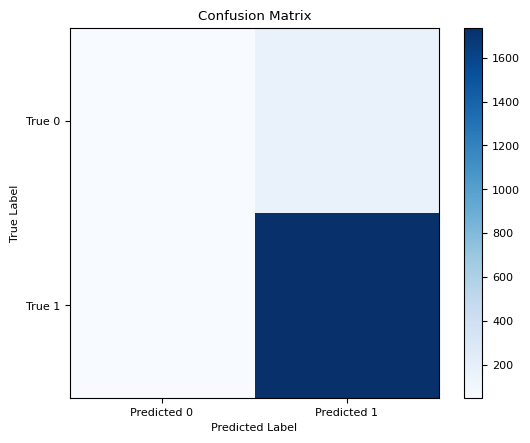

In [57]:
#plotting the matrix

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])
plt.show()

In [58]:
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.24      0.32       215
           1       0.91      0.97      0.94      1785

    accuracy                           0.89      2000
   macro avg       0.71      0.60      0.63      2000
weighted avg       0.87      0.89      0.88      2000



In [59]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_proba(weights, X):    
    proba = []
    # Iterate over each sample in X
    for i in range(0, X_test.shape[0]):
        z = 0
        # Calculate the weighted sum of features
        for j in range(0, 9):            
            z += X_test[i][j] * weights[j + 1]    
        z += weights[0]
        # Apply sigmoid function to get the predicted probability
        proba.append(sigmoid(z))            
    return proba

# Predict probabilities for class 1
y_prob = predict_proba(w, X_test)
y_prob = np.array(y_prob)


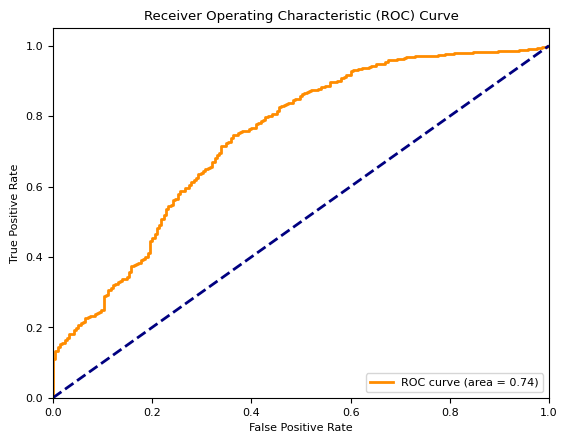

Log Loss: 1.0888783576559147


In [60]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
logloss = log_loss(y_test, y_prob)
print("Log Loss:", logloss)

## At the end of Phase 3 the values are

       class    precision   recall   f1-score    support

           0       0.50      0.24      0.32        215
           1       0.91      0.97      0.94        1785

    accuracy                           0.89         20


<br>Log loss : 1.0888783576559147<br>
AUC : 0.74

<h1><center>Phase 4</center></h1>

In [61]:
#using inbuilt functions

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 144   71]
 [ 579 1206]]


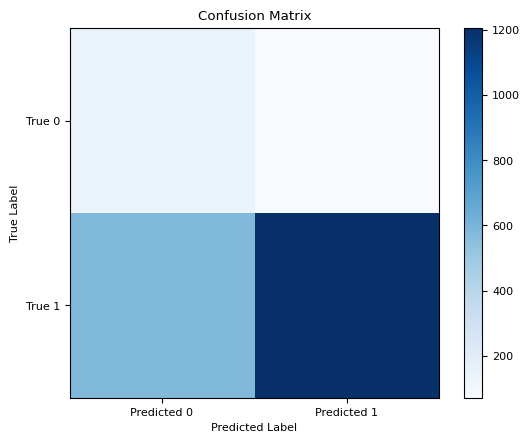

In [62]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])
plt.show()

In [63]:
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.67      0.31       215
           1       0.94      0.68      0.79      1785

    accuracy                           0.68      2000
   macro avg       0.57      0.67      0.55      2000
weighted avg       0.86      0.68      0.74      2000



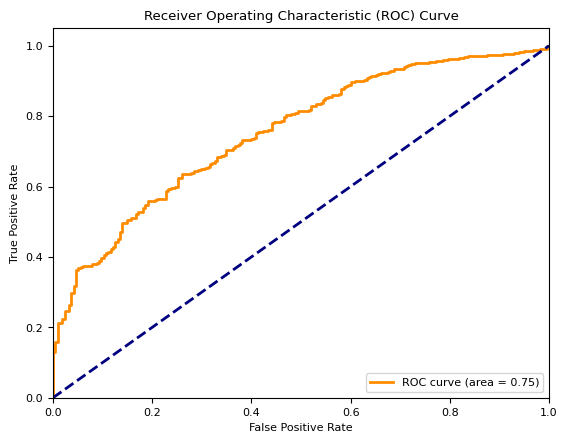

Log Loss: 0.5735742852134894


In [65]:
y_prob = model1.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

logloss = log_loss(y_test, y_prob)
print("Log Loss:", logloss)

## At the end of Phase 4 the values are

       class    precision   recall   f1-score    support

           0       0.20      0.67      0.31         215
           1       0.94      0.68      0.79        1785

    accuracy                           0.68        2000


<br>Log loss : 0.5735742852134894<br>
AUC : 0.75

##### <center>Comparision of Phase 3 and Phase 4<center>

Based on the observations made:
1. The F1 score for class 0 is much better now, indicating that the model has improved with augmentation and noise addition correctly predicting instances of class 0.
2. The log loss is higher using the model developed from scratch compared to the inbuilt model. This suggests that the scratch model's predictions are little bit confident or accurate than those of the inbuilt model.
3. The AUC of the scratch model is almost equal to the inbuilt model on the updated data, indicating that the updated and balanced data helped in improving both the performances.

## Overall adding noise and augmenting the data and selecting the balanced data improved the overall performance and not just that the model built from scratch is on par and better in some outcomes than the inbuilt model.

<h1><center>Phase 5</center></h1>

The performance of a machine learning model can be measured using various evaluation metrics, depending on the task and the nature of the data. Some common metrics include:

Accuracy: The proportion of correctly classified instances out of the total instances. It is calculated as the ratio of the number of correct predictions to the total number of predictions.

Precision: Also known as positive predictive value, it is the proportion of true positive predictions (correctly predicted positives) out of all positive predictions. It is calculated as TP / (TP + FP), where TP is the number of true positives and FP is the number of false positives.

Recall: Also known as sensitivity or true positive rate, it is the proportion of true positive predictions (correctly predicted positives) out of all actual positive instances. It is calculated as TP / (TP + FN), where FN is the number of false negatives.

F1 Score: The harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when there is an imbalance between the number of positive and negative instances in the data. It is calculated as 2 * (precision * recall) / (precision + recall).

Confusion Matrix: A table that summarizes the performance of a classification model. It shows the number of true positive, true negative, false positive, and false negative predictions.

ROC Curve & AUC: The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the performance of a binary classification model across different threshold settings. It plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings. The Area Under the ROC Curve (AUC) is a single scalar value that represents the area under the ROC curve. It provides a measure of the model's ability to distinguish between positive and negative classes.

Log Loss: Also known as logistic loss or cross-entropy loss, it is a loss function used in logistic regression and other probabilistic models. It measures the performance of a classification model by quantifying the difference between the predicted probabilities and the actual class labels.

